# Project 7 - Introduction to Machine Learning

Author: Cole Nollette

Date: 2/19/24

GitHub Repo: ``https://github.com/nollettecs/datafun-07-ml``

## Import Dependencies

In [42]:
# Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow
import seaborn as sns
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


## Chart a Straight Line (Part 1)

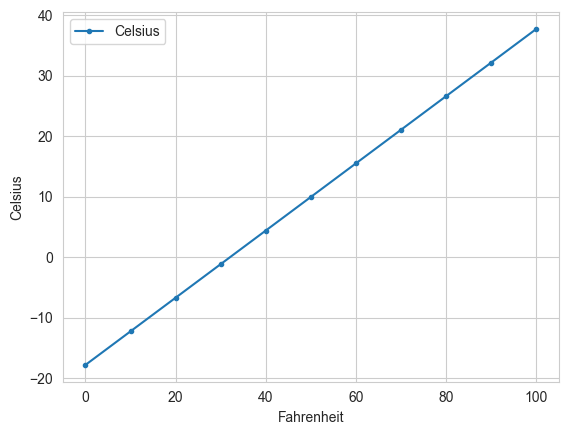

In [43]:
# Linear Relationships: Celcius and Fahrenheit

c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range (0, 101, 10)]

# Build dataframe into chart
temps_df = pd.DataFrame(temps, columns =['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Predict the Average High Temperature in NYC in January (Part2)

### Section 1: Data Acquistion

In [44]:
# Load the Data
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: Data Inspection

In [45]:
# Display the first few rows of the DataFrame
# Review the first few rows of the data

nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [46]:
# Display the last few rows of the Dataframe
# Review the last few rows of the data

nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Data Cleaning

In [47]:
# Renaming the 'Value' column to 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Display the new titled DataFrame
nyc_df.head(5)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [48]:
# Check the column type Date
nyc_df.Date.dtype

dtype('int64')

In [49]:
# Floor divide the Date column by 100
nyc_df.Date = nyc_df.Date.floordiv(100)

# Display the new DataFrame
nyc_df.head(5)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4: Descriptive Statistics

In [50]:
# Set precision to 2 decimal places
pd.set_option('display.precision',2)

# Generate Descriptive statistics for Temperature
nyc_df.Temperature.describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Build the Model

In [51]:
# Perform linear regression on the Date and Temperature columns
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

# Slope for Regression
linear_regression.slope

0.014771361132966163

In [52]:
# Regression Intercept
linear_regression.intercept

8.694993233674289

### Section 6: Predict

In [53]:
# Predict the average high temperature for 2024 and 1890
# Predict January 2024 average temp
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

In [54]:
# Predict January 1890 average temp
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7: Visualizations

(10.0, 70.0)

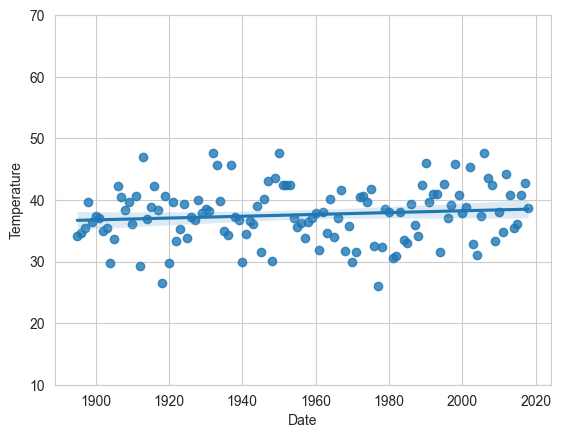

In [55]:
# Create a regression plot using Seaborn
sns.set_style('whitegrid')

# Create the plot
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

# Set the axis limits
axes.set_ylim(10, 70)

# Predict the Average High Temperature in NYC in January (Part3)

### Section 1: Build the Model

In [56]:
# Use test_train_split to split the data into training and testing
# CSV file into Dataframe
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Renaming Columns of the DataFrame
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(5)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [57]:
# Splitting Data in training and testing
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)

X_train.shape

(93, 1)

In [58]:
X_test.shape

(31, 1)

### Using Linear Regression to train the model

In [59]:
# Training the Model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [60]:
# Coefficients of the model
linear_regression.coef_

array([0.01939167])

In [61]:
# Intercept of the model
linear_regression.intercept_

-0.30779820252658396

### Section 2: Test the Model

In [62]:
# Making predictions using the linear regression model
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print (f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3: Predict

In [63]:
# Predicting future temperatures
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2024)

array([38.94094855])

In [64]:
# Predicting past temperatures
predict(1890)

array([36.34246432])

### Section 4: Visualizations

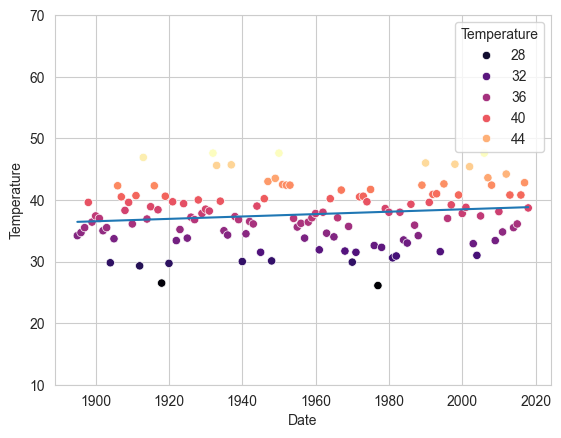

In [65]:
# Creating a scatterplot to visualize the past and future relationship between Date and Temperature
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='magma', legend=True)

# Setting axis limits
axes.set_ylim(10, 70)

# Create an array of x values
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

# Predict y values
y = predict(x)

# Plotting the linear regression
line = plt.plot(x, y)

# Add Your Insights (Part4)

- ### Summary-

In chapter 10 we used a technique called SLR or simple linear regression to make predictions from time series data.  Our dataset was from the average high temperature in January in NYC from 1895 through 2018! We took this dataset and built an SLR prediction model to predict what the temperatures were in 1890 and 2024. The predicted temperature for January 2024 in NYC was 38.59, and the predicted temperature for 1890 was 36.61!

In chapter 15 we still use the SLR method, but we implement a scikit-learn estimator then use the coefficient and intercept values calculated by the scikit-learn estimator to make future predictions. The scikit-learn esitmator predicted the 2024 average high temperature in January in NYC to be 38.94 and the 1890 temperature to be 36.61!

- ### Differences-

As you look through these visualizations and graphs you can see that there is a slight difference between the two predictive models. Why is that? Is one better than the other? Well, simple linear regression is a very basic and standard model.  The entire graph is under the assumption that there is going to be a slight change from year to year.  As the book states, simple linear regression describes the relationship between an independent and dependent variable with a straight line, known as a regression line! Now, the scikit-learn estimator can handle far more complex relationships depending upon the chosen algorithm.  The scikit-learn estimator is definitely more complex, but can handle more complex variable in the given dataset.

- ### Observations of the Dataset-

As we observe the dataset we can see that both models have predicted the future temperature to increase slowly over time! Both models tend to stay fairly similar over the course of a couple hundred years as well, which I find fascinating! Fun fact, in only 200 years the average high January temperature of NYC will be 10 degrees higher than what it currently is!
